not simple linear regression
    2 or more models
    

In [483]:
import pandas as pd
import statsmodels.formula.api as stats
import statsmodels.api as sm
import numpy as np
import math
import sklearn.metrics as sk
from bs4 import BeautifulSoup
import requests
import json
from os import path
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import random

In [2]:
not path.exists('FullStats\FullSeasonStats_2010.csv')

False

In [98]:
for key in bigStats:
    print(key+str(len(bigStats[key])))

Name_HigherRank5386
GamesPlayed_HigherRank5386
ConfWins_HigherRank5386
ConfLosses_HigherRank5386
TotalWins_HigherRank5386
TotalLosses_HigherRank5386
OffEff_HigherRank5386
DefEff_HigherRank5386
Turnovers_HigherRank5386
ForcedTurnovers_HigherRank5386
2PFGOff_HigherRank5386
2PFGDef_HigherRank5386
3PFGOff_HigherRank5386
3PFGDef_HigherRank5386
FTOff_HigherRank5386
FTDef_HigherRank5386
Rank_HigherRank26930
Name_LowerRank5386
GamesPlayed_LowerRank5386
OffEff_LowerRank5386
DefEff_LowerRank5386
Turnovers_LowerRank5386
ForcedTurnovers_LowerRank5386
2PFGOff_LowerRank5386
2PFGDef_LowerRank5386
3PFGOff_LowerRank5386
3PFGDef_LowerRank5386
FTOff_LowerRank5386
FTDef_LowerRank5386
Rank_LowerRank5386
Results_HigherRank5386
Differntial5386
Score5386
PlusMinus_HigherRank5386


In [105]:
years = list(range(2010,2022))
for year in years:
    GamesPlayed=[]
    bigStats = {}
    filename = 'FullStats\FullSeasonStats_'+str(year)+'.csv'
    with open(filename,'r') as f:
        df = pd.read_csv(f)
    for team in df.Name:
        filename2 = 'Games\\'+str(year)+'\\'+team+'_'+str(year)+'_Opponent.csv'
        with open(filename2,'r') as f:
            df2 = pd.read_csv(f)
            num=0
        for opponent in df2.Opponent:
            if opponent not in GamesPlayed:
                HigherRank = GetStats(team,df)
                LowerRank = GetStats(opponent,df)
                if not LowerRank.empty:
                    AppendNewStats(HigherRank,LowerRank,bigStats)
                    AppendGameResults(df2,num,bigStats)
            num+=1
        GamesPlayed.append(team)
    bigStats1 = pd.DataFrame(data = bigStats)
    bigStats1.to_csv('Matchup\\MatchupStats_'+str(year)+'.csv', index = False)
    print('Finished Processing '+str(year))


Finished Processing 2010
Finished Processing 2011
Finished Processing 2012
Finished Processing 2013
Finished Processing 2014
Finished Processing 2015
Finished Processing 2016
Finished Processing 2017
Finished Processing 2018
Finished Processing 2019
Finished Processing 2020
Finished Processing 2021


In [463]:
def AppendNewStats(HigherRank,LowerRank,bigStats):
    record = ['ConfRecord','TotalRecord']
    for item in HigherRank:
        keyval1 = item+'_HigherRank'
        if item in record:
            keyvalWin = keyval1.replace('Record','Wins')
            keyvalLoss = keyval1.replace('Record','Losses')
            ratio = HigherRank[item].iloc[0].split('_')
            append_value(bigStats, keyvalWin, ratio[0])
            append_value(bigStats, keyvalLoss, ratio[1])
        else:
            append_value(bigStats, keyval1, HigherRank[item].iloc[0])
    for item in LowerRank:
        keyval2 = item+'_LowerRank'
        if item in record:
            keyvalWin = keyval2.replace('Record','Wins')
            keyvalLoss = keyval2.replace('Record','Losses')
            ratio = LowerRank[item].iloc[0].split('_')
            append_value(bigStats, keyvalWin,ratio[0])
            append_value(bigStats, keyvalLoss, ratio[1])
        else:
            append_value(bigStats, keyval2, LowerRank[item].iloc[0])
    return(0)

def GetStats(team,fullstats):
    return(fullstats[fullstats['Name'] == team])
    
def AppendGameResults(df2,num,bigStats):
    for item in df2:
        if item != 'Opponent':
            if item == 'Score':
                scores = df2[item].iloc[num].split('_')
                for i in range(0,2):
                    scores[i] = (scores[i].split())[0]
                differential = int(scores[1])-int(scores[0])
                if df2['Results'].iloc[num] == 'W':
                    differential = abs(differential)
                append_value(bigStats, 'Differntial', differential)
            if item == 'Results' or item == 'PlusMinus':
                keyval = item+'_HigherRank'
            else:
                keyval = item
            append_value(bigStats, keyval, df2[item].iloc[num])
    return(0)
    
    
stats = {}
filename = 'FullStats\FullSeasonStats_'+str(year)+'.csv'
with open(filename,'r') as f:
    df = pd.read_csv(f)
played = ['Villanova','Gonzaga']
for name in df.Name:
    if name in played:
        df_new = df[df['Name'] == name]
        for item in df_new:
            append_value(stats, item, df_new[item].iloc[0])
            

In [87]:
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value

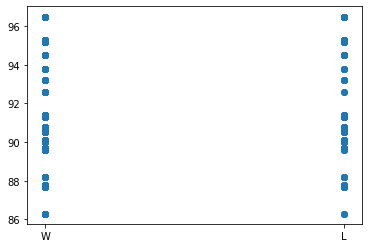

In [243]:
plt.figure()
plt.scatter(df['Results_HigherRank'][:500],df['DefEff_HigherRank'][:500])

C:\Users\t_lyp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


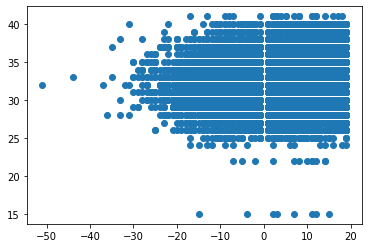

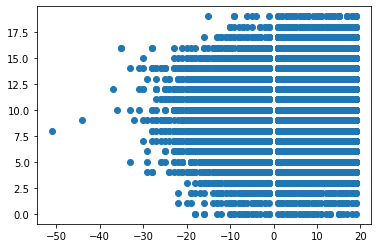

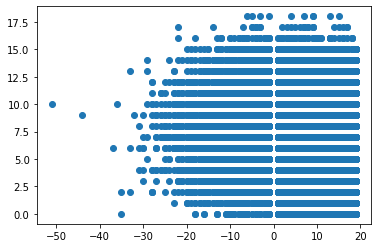

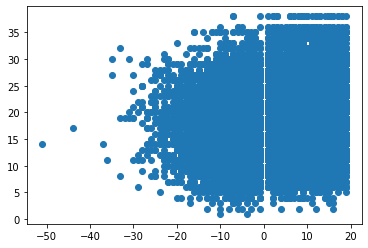

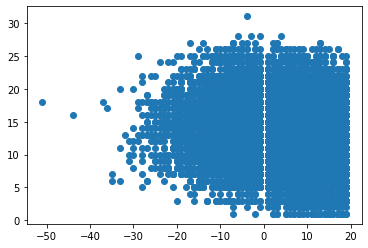

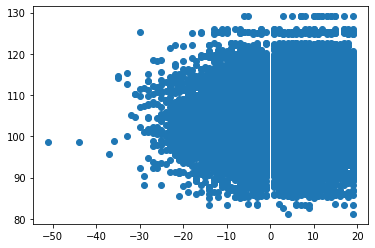

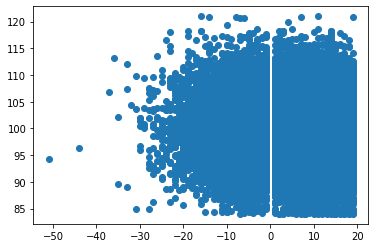

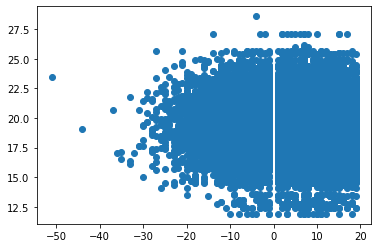

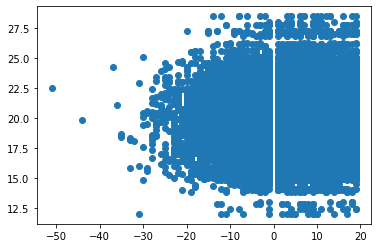

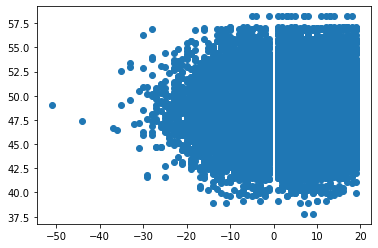

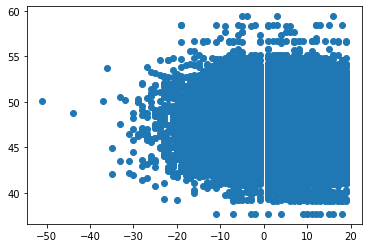

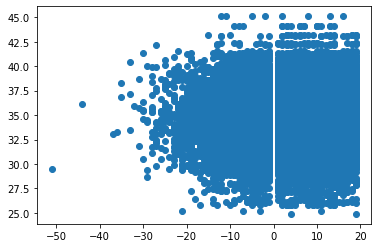

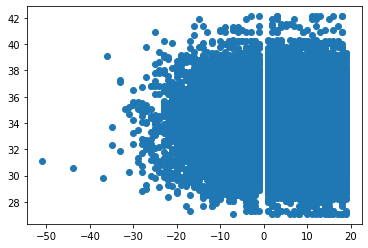

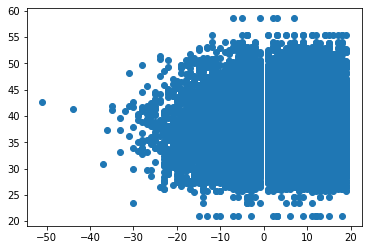

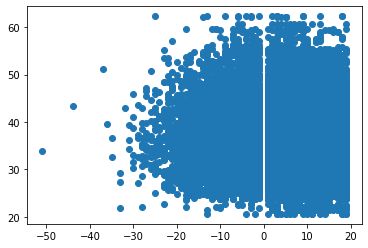

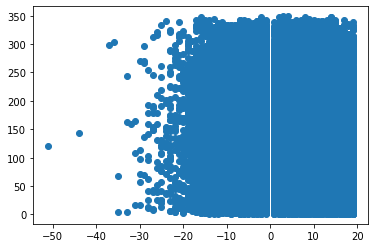

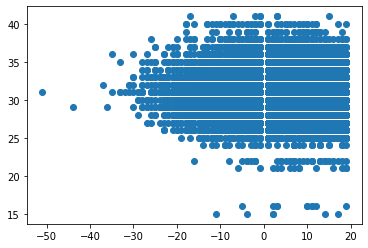

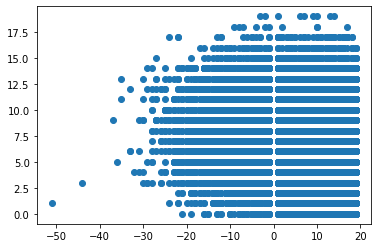

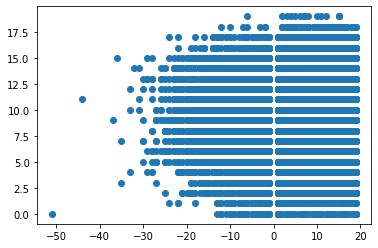

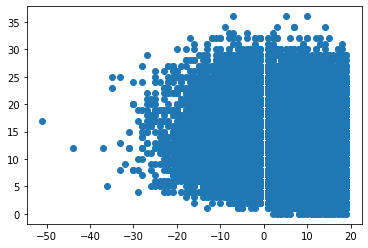

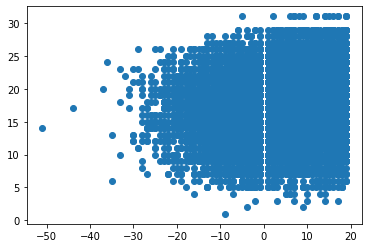

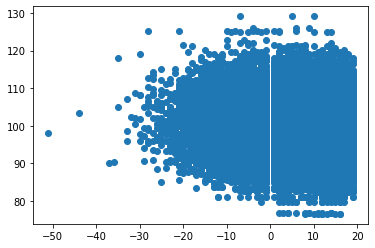

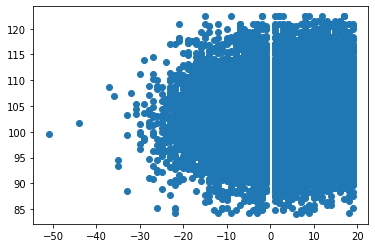

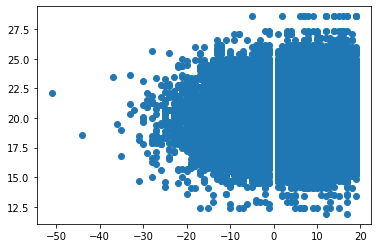

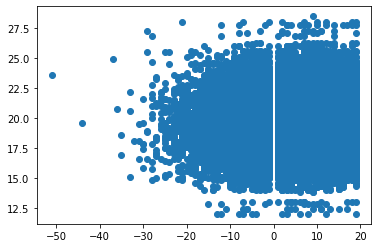

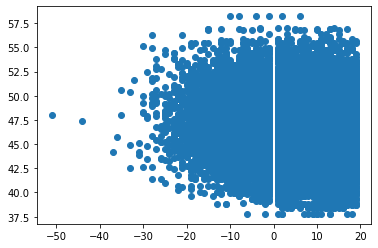

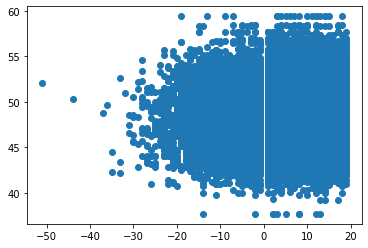

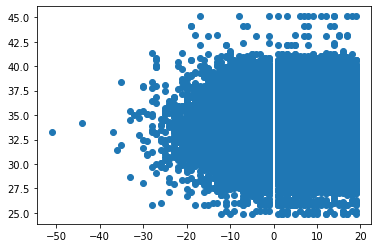

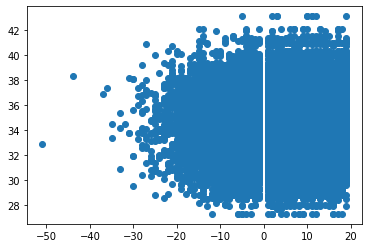

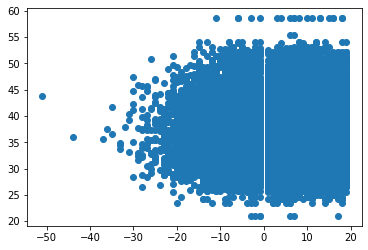

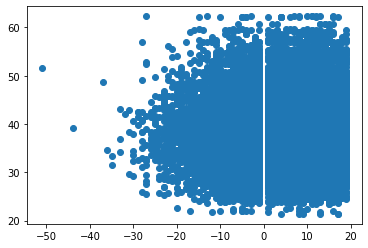

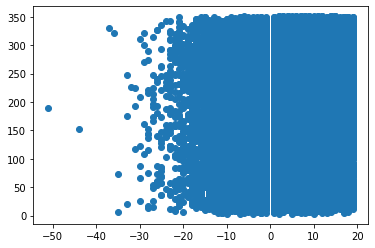

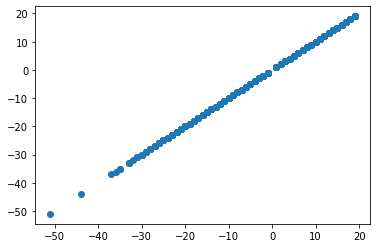

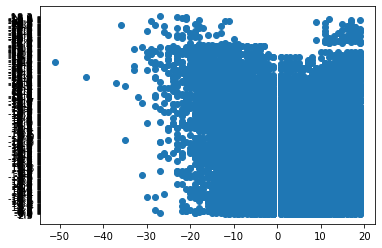

In [263]:
filename = 'Matchup\\MatchupStats_2018.csv'
with open(filename,'r') as f:
    df1 = pd.read_csv(f)

for item in df1:
    if item !="Name_HigherRank" and item!='Results_HigherRank'and item!='Name_LowerRank'and item!='Score':
        plt.figure()
        plt.scatter(df['Differntial'],df[item])

C:\Users\t_lyp\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
C:\Users\t_lyp\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
C:\Users\t_lyp\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume 

TypeError: unsupported operand type(s) for /: 'str' and 'int'

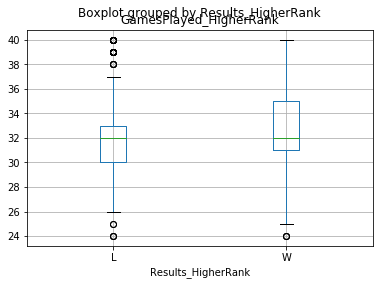

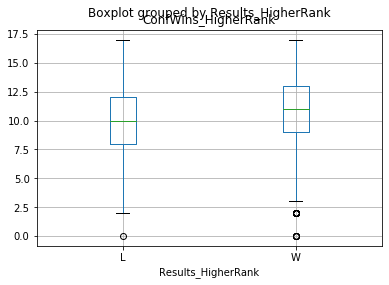

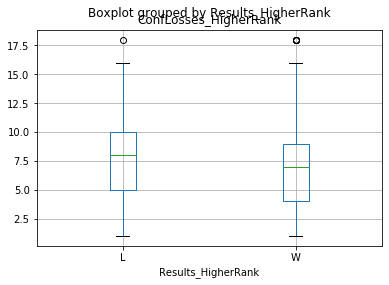

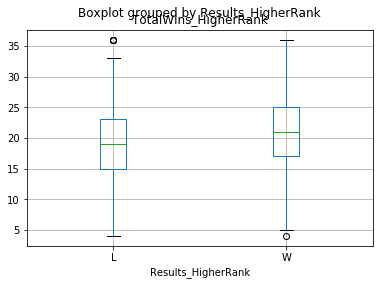

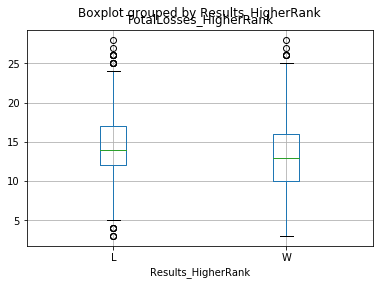

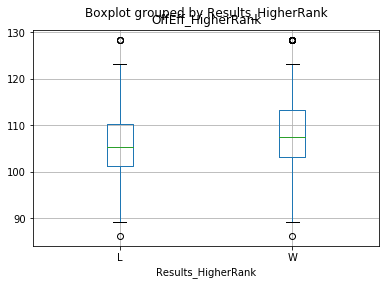

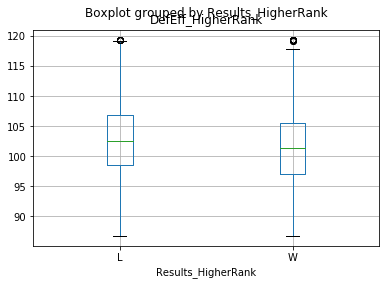

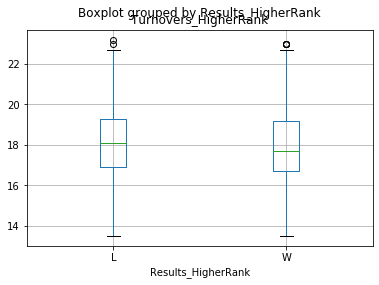

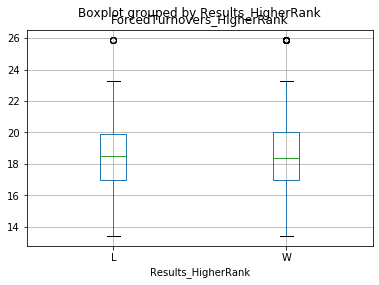

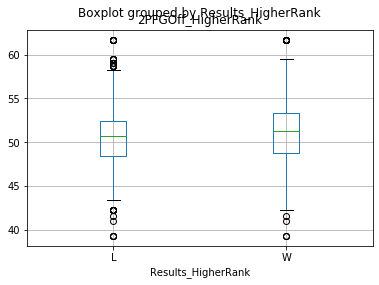

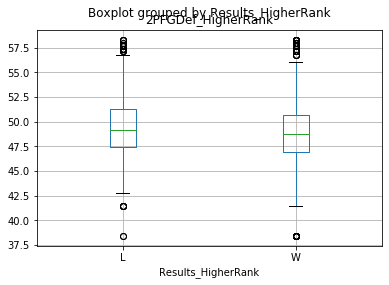

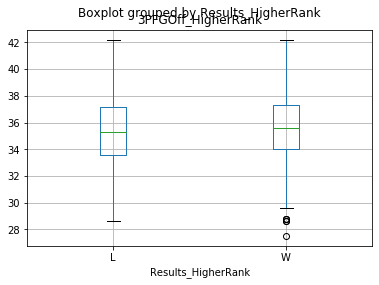

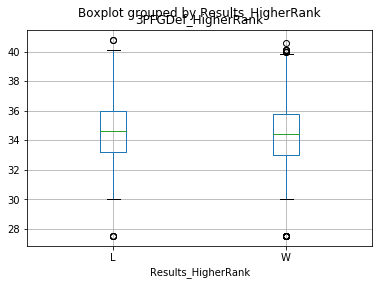

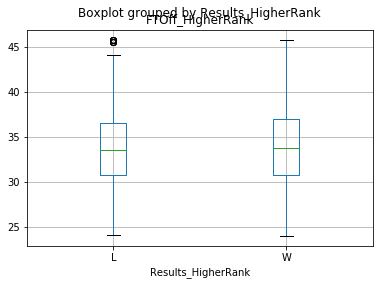

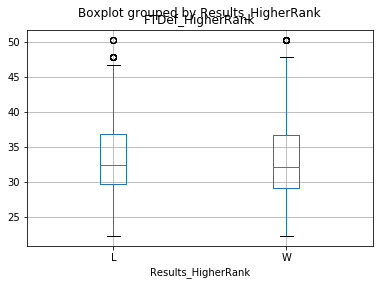

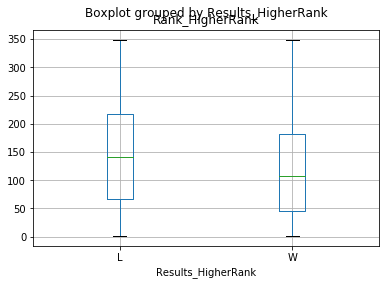

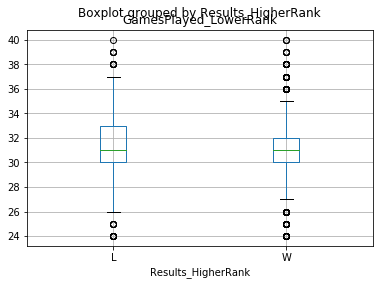

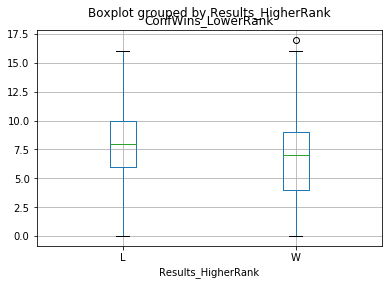

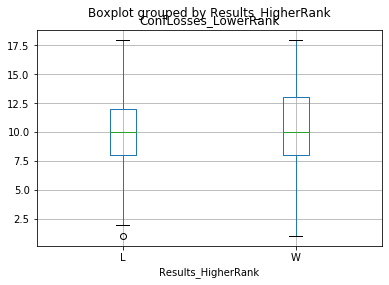

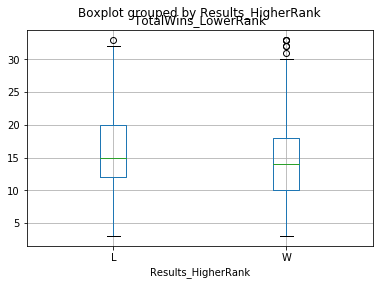

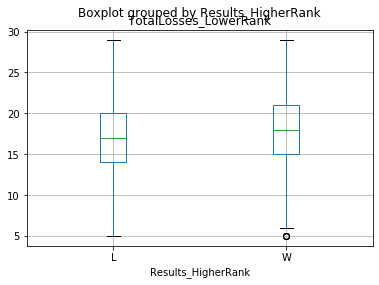

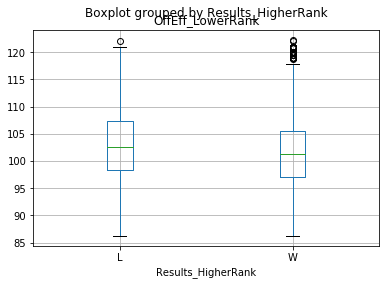

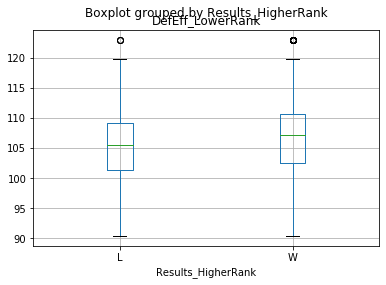

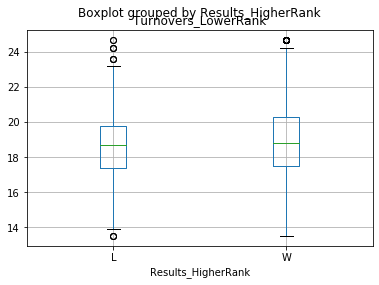

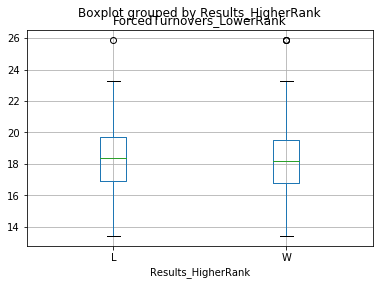

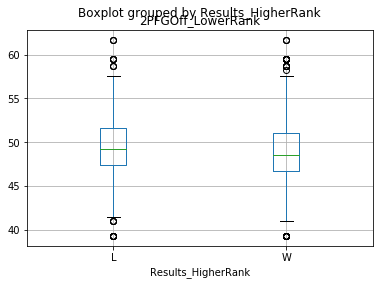

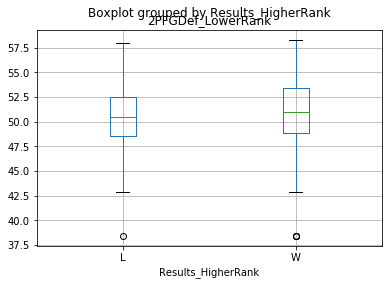

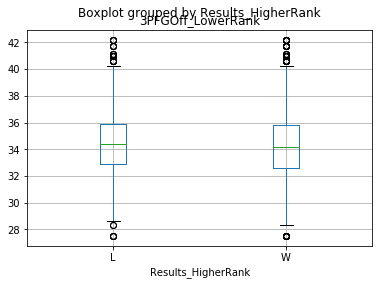

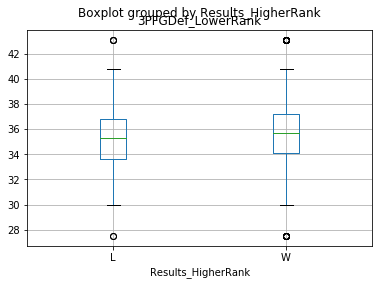

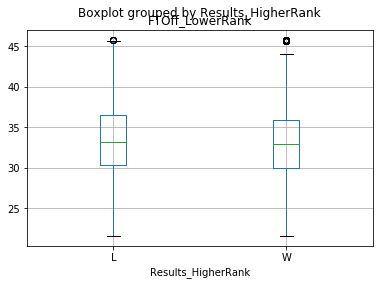

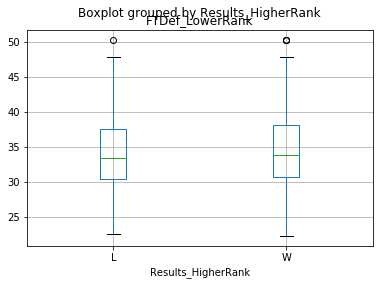

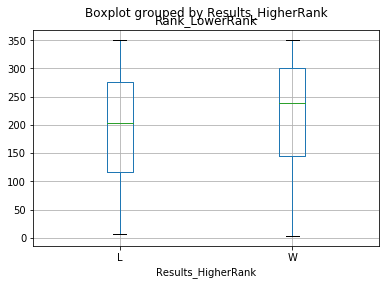

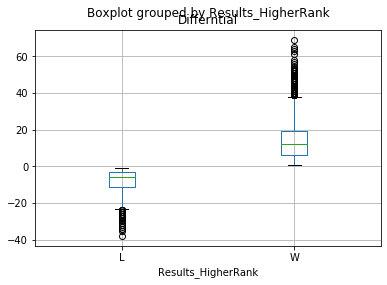

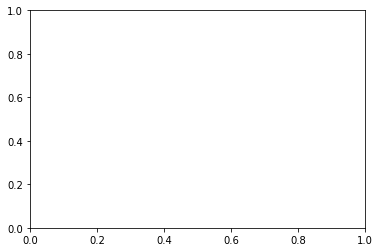

In [260]:
filename = 'Matchup\\MatchupStats_2018.csv'
with open(filename,'r') as f:
    df1 = pd.read_csv(f)

for item in df1:
    if item !="Name_HigherRank" and item!='Results_HigherRank'and item!='Name_LowerRank'and item!='Score':
        df1.boxplot(column=[str(item)],by='Results_HigherRank')

In [271]:
#First Regression Attempt
listed=[]
for year in range(2010,2016):
    filename = 'Matchup\\MatchupStats_'+str(year)+'.csv'
    with open(filename,'r') as f:
        df1 = pd.read_csv(f)
        listed.append(df1)
    df = pd.concat(listed)
print(df.head())
test = 'Differntial~'
#df_new = df[df['PlusMinus_HigherRank']!='-']
df_newer= df
#print(df_newer.head())


df = df[df['Differntial']<10]
df = df[df['Differntial']>-10]

lm_fit = stats.ols(formula='Differntial~OffEff_HigherRank+DefEff_HigherRank+OffEff_LowerRank+DefEff_LowerRank+Turnovers_LowerRank+Rank_LowerRank+Rank_HigherRank+ConfLosses_LowerRank+ConfLosses_HigherRank',data=df).fit()
print(lm_fit.summary())

TestPoint = df[['OffEff_HigherRank','DefEff_HigherRank','OffEff_LowerRank','DefEff_LowerRank','Turnovers_LowerRank','Rank_LowerRank','Rank_HigherRank','ConfLosses_LowerRank','ConfLosses_HigherRank']]
y_pred = lm_fit.predict(TestPoint)
Check = df[['Differntial']]
print(Check.head())
#print(y_pred)
residual = Check['Differntial']-y_pred
total=0
for i in residual:
    total+=i**2
MSE = total/len(residual)
print(MSE)
print(max(residual))
i = list(range(0,100))


  Name_HigherRank  GamesPlayed_HigherRank  ConfWins_HigherRank  \
0            Duke                      40                   13   
1            Duke                      40                   13   
2            Duke                      40                   13   
3            Duke                      40                   13   
4            Duke                      40                   13   

   ConfLosses_HigherRank  TotalWins_HigherRank  TotalLosses_HigherRank  \
0                      3                    35                       5   
1                      3                    35                       5   
2                      3                    35                       5   
3                      3                    35                       5   
4                      3                    35                       5   

   OffEff_HigherRank  DefEff_HigherRank  Turnovers_HigherRank  \
0              120.8               87.8                  16.5   
1              120.8        

In [366]:
listed = []
with open('Matchup\\MatchupStats_2019.csv','r') as f:
    df1 = pd.read_csv(f)
    #listed.append(df)
#with open('Matchup\\MatchupStats_2018.csv','r') as f:
#    df = pd.read_csv(f)
#    listed.append(df)
#with open('Matchup\\MatchupStats_2017.csv','r') as f:
#    df = pd.read_csv(f)
#    listed.append(df)
#with open('Matchup\\MatchupStats_2016.csv','r') as f:
#    df = pd.read_csv(f)
#    listed.append(df)
#df1 = pd.concat(listed)
df1 = df1.replace('L',0)
df1 = df1.replace('W',1)

print(df1.describe())

#print(df1.head())

#trainX = df1[['OffEff_HigherRank','DefEff_HigherRank','OffEff_LowerRank','DefEff_LowerRank','Turnovers_LowerRank','Rank_HigherRank','ConfLosses_LowerRank','ConfLosses_HigherRank']]
trainX = df1
trainX = trainX.drop(['TotalWins_HigherRank','Results_HigherRank','Differntial','Name_HigherRank','Name_LowerRank','Score','PlusMinus_HigherRank','ConfWins_LowerRank'],axis=1)
trainY = df1[['Results_HigherRank']]
print(trainX.head())
print(trainY.head())

lin_reg = sm.Logit(trainY,trainX).fit()

lin_reg.summary()

       GamesPlayed_HigherRank  ConfWins_HigherRank  ConfLosses_HigherRank  \
count             5603.000000          5603.000000            5603.000000   
mean                32.712119            10.484919               7.189541   
std                  2.528899             3.371274               3.381247   
min                 26.000000             0.000000               0.000000   
25%                 31.000000             8.000000               5.000000   
50%                 33.000000            10.000000               7.000000   
75%                 34.000000            13.000000              10.000000   
max                 39.000000            18.000000              18.000000   

       TotalWins_HigherRank  TotalLosses_HigherRank  OffEff_HigherRank  \
count           5603.000000             5603.000000        5603.000000   
mean              20.456898               13.334464         107.355452   
std                5.869890                4.578312           6.536813   
min       

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Results_HigherRank   No. Observations:                 5603
Model:                          Logit   Df Residuals:                     5573
Method:                           MLE   Df Model:                           29
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                  0.1432
Time:                        08:49:27   Log-Likelihood:                -2737.8
converged:                       True   LL-Null:                       -3195.3
Covariance Type:            nonrobust   LLR p-value:                8.005e-174
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
GamesPlayed_HigherRank         0.0777      0.021      3.632      0.000       0.036       0.120
ConfWins_HigherRank            0.0456      0.034      1.355      0.176      -0.020       0.112
ConfLosses_HigherRank          0.0828      0.035      2.369      0.018       0.014       0.151
TotalLosses_HigherRank        -0.1278      0.023     -5.643      0.000      -0.172      -0.083
OffEff_HigherRank              0.0900      0.018      4.938      0.000       0.054       0.126
DefEff_HigherRank             -0.0925      0.022     -4.251      0.000      -0.135      -0.050
Turnovers_HigherRank           0.0204      0.023      0.891      0.373      -0.025       0.065
ForcedTurnovers_HigherRank    -0.0320      0.022     -1.431      0.152      -0.076       0.012
TwoPFGOff_HigherRank          -0.0374      0.015     -2.419      0.016      -0.068      -0.007
TwoPFGDef_HigherRank           0.0389      0.020      1.901      0.057      -0.001       0.079
ThreePFGOff_HigherRank        -0.0369      0.017     -2.138      0.033      -0.071      -0.003
ThreePFGDef_HigherRank         0.0329      0.021      1.543      0.123      -0.009       0.075
FTOff_HigherRank              -0.0001      0.008     -0.015      0.988      -0.016       0.016
FTDef_HigherRank              -0.0038      0.009     -0.424      0.672      -0.021       0.014
Rank_HigherRank               -0.0032      0.002     -1.806      0.071      -0.007       0.000
GamesPlayed_LowerRank         -0.1140      0.037     -3.109      0.002      -0.186      -0.042
ConfLosses_LowerRank          -0.0657      0.021     -3.075      0.002      -0.108      -0.024
TotalWins_LowerRank            0.0579      0.040      1.446      0.148      -0.021       0.136
TotalLosses_LowerRank          0.1890      0.048      3.938      0.000       0.095       0.283
OffEff_LowerRank              -0.1362      0.023     -6.015      0.000      -0.181      -0.092
DefEff_LowerRank               0.1215      0.023      5.257      0.000       0.076       0.167
Turnovers_LowerRank           -0.0201      0.023     -0.887      0.375      -0.065       0.024
ForcedTurnovers_LowerRank      0.0278      0.023      1.219      0.223      -0.017       0.073
TwoPFGOff_LowerRank            0.0249      0.016      1.566      0.117      -0.006       0.056
TwoPFGDef_LowerRank           -0.0068      0.020     -0.339      0.734      -0.046       0.032
ThreePFGOff_LowerRank          0.0460      0.017      2.643      0.008       0.012       0.080
ThreePFGDef_LowerRank         -0.0219      0.021     -1.021      0.307      -0.064       0.020
FTOff_LowerRank               -0.0044      0.008     -0.535      0.592      -0.021       0.012
FTDef_LowerRank               -0.0039      0.009     -0.451      0.652      -0.021       0.013
Rank_LowerRank                -0.0017      0.002     -0.829      0.407      -0.006       0.002
==============================================================================================
"""

In [459]:
y_pred6 = lin_reg.predict(trainX)
y_pred = y_pred6.round()
Conf_mtx =sk.confusion_matrix(trainY, y_pred)
print(Conf_mtx)

print("Logistic Regression accuracy = "+str((Conf_mtx[0,0]+Conf_mtx[1,1])/len(trainX)))


[[ 285 1157]
 [ 238 3923]]
Logistic Regression accuracy = 0.7510262359450295


In [368]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
LDAFit = lda.fit(trainX, trainY)
y_pred1 = LDAFit.predict(trainX)

Conf_mtx1 =sk.confusion_matrix(trainY, y_pred1)
print(Conf_mtx1)
print("LDA accuracy = "+str((Conf_mtx1[0,0]+Conf_mtx1[1,1])/len(trainX)))

[[ 175 1267]
 [ 121 4040]]
LDA accuracy = 0.7522755666607175


C:\Users\t_lyp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [374]:
yExperimental = []
for i in y_pred6:
    if i > 0.56:
        yExperimental.append(1)
    else:
        yExperimental.append(0)
count=0
for j in range(109,113):
    initial = y_pred6[j]
    count+=1
    val = initial
    for i in range(0,count):
        dif = val-0.5
        val = val-dif*0.5
    print(val)
val = y_pred6[38]
for i in range(0,3):
    dif = val-0.5
    val = val-dif*0.5
print(val)

va = df1.iloc[663]

print(va)

print("vcu: "+str(y_pred6[663]))
Conf_mtx4 =sk.confusion_matrix(trainY, yExperimental)
print(Conf_mtx4)

print("Logistic Regression accuracy = "+str((Conf_mtx4[0,0]+Conf_mtx4[1,1])/len(trainX)))


0.44092605197017665
0.46276309589166326
0.5618158256920913
0.5307698986367824
0.5621905992644756
Name_HigherRank                   UCF
GamesPlayed_HigherRank             33
ConfWins_HigherRank                13
ConfLosses_HigherRank               5
TotalWins_HigherRank               24
TotalLosses_HigherRank              9
OffEff_HigherRank               113.6
DefEff_HigherRank                94.4
Turnovers_HigherRank             17.6
ForcedTurnovers_HigherRank         18
TwoPFGOff_HigherRank               52
TwoPFGDef_HigherRank             44.5
ThreePFGOff_HigherRank           36.5
ThreePFGDef_HigherRank           31.3
FTOff_HigherRank                 45.3
FTDef_HigherRank                 29.2
Rank_HigherRank                    21
Name_LowerRank                    VCU
GamesPlayed_LowerRank              33
ConfWins_LowerRank                 16
ConfLosses_LowerRank                2
TotalWins_LowerRank                25
TotalLosses_LowerRank               8
OffEff_LowerRank             

In [348]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
QDAFit = qda.fit(trainX, trainY)
y_pred2 = QDAFit.predict(trainX)

Conf_mtx2 =sk.confusion_matrix(trainY, y_pred2)
print("QDA accuracy = "+str((Conf_mtx2[0,0]+Conf_mtx2[1,1])/len(trainX)))

QDA accuracy = 0.6661036036036037


C:\Users\t_lyp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [901]:
#2019 Winners
round1_2019=['Duke','UCF','Liberty','Virginia Tech','Maryland','LSU','Minnesota','Michigan St.','Gonzaga','Baylor','Murray St.','Florida St.','Texas Tech','Florida','Michigan','Virginia','Oklahoma','Oregon','UC Irvine','Villanova','Purdue','Iowa','Tennessee','North Carolina','Washington','Auburn','Kansas St.','Ohio St.','Houston','Wofford','Kentucky']
round2_2019=['Duke','Virginia Tech','LSU','Michigan St.','Gonzaga','Florida St.','Texas Tech','Michigan','Virginia','Oregon','Purdue','Tennessee','North Carolina','Auburn','Houston','Kentucky']
round3_2019=['Duke','Michigan St.','Gonzaga','Texas Tech','Virginia','Purdue','Auburn','Kentucky']
round4_2019=['Michigan St.','Texas Tech','Virginia','Auburn']
round5_2019=['Texas Tech','Virginia']

#2018 Winners
round1_2018=['UMBC','Kansas St.','Kentucky','Buffalo','Loyola Chicago','Tennessee','Nevada','Cincinnati','Xavier','Florida St.','Ohio St.','Gonzaga','Houston','Michigan','Texas A&M','North Carolina','Villanova','Alabama','West Virginia','Marshall','Florida','Texas Tech','Butler','Purdue','Kansas','Seton Hall','Clemson','Auburn','Syracuse','Michigan St.','Rhode Island','Duke']
round2_2018=['Kansas St.','Kentucky','Loyola Chicago','Nevada','Florida St.','Gonzaga','Michigan','Texas A&M','Villanova','West Virginia','Texas Tech','Purdue','Kansas','Clemson','Syracuse','Duke']
round3_2018=['Kansas St.','Loyola Chicago','Florida St.','Michigan','Villanova','Texas Tech','Kansas','Duke']
round4_2018=['Loyola Chicago','Michigan','Villanova','Kansas']
round5_2018=['Michigan','Villanova']

#Stored
correct64=[]
correct32=[]
correct16=[]
correct8=[]
correct4=[]

In [859]:
bracket = open('2018Bracket.csv','r')
teams=[]

for i in bracket.readlines():
    teams.append(i.strip('\n'))
bracket.close()
R1Prob = GetRoundProbabilities(teams,0,2019)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(teams,winner)
correct=0
count=0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round1_2018:
        correct+=1
correct64.append(correct)



R1Prob = GetRoundProbabilities(WinningTeams,1,2019)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count=0
correct = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round2_2018:
        correct+=1
correct32.append(correct)



R1Prob = GetRoundProbabilities(WinningTeams,2,2019)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count = 0
correct = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round3_2018:
        correct+=1
correct16.append(correct)



R1Prob = GetRoundProbabilities(WinningTeams,3,2019)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count = 0
correct = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round4_2018:
        correct+=1
correct8.append(correct)
    
    
R1Prob = GetRoundProbabilities(WinningTeams,3,2019)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round5_2018:
        correct+=1
correct4.append(correct)



1    Virginia
Name: Name, dtype: object
163    UMBC
Name: Name, dtype: object

22    Creighton
Name: Name, dtype: object
29    Kansas St.
Name: Name, dtype: object

19    Kentucky
Name: Name, dtype: object
50    Davidson
Name: Name, dtype: object

33    Arizona
Name: Name, dtype: object
67    Buffalo
Name: Name, dtype: object

28    Miami FL
Name: Name, dtype: object
40    Loyola Chicago
Name: Name, dtype: object

10    Tennessee
Name: Name, dtype: object
136    Wright St.
Name: Name, dtype: object

39    Nevada
Name: Name, dtype: object
31    Texas
Name: Name, dtype: object

4    Cincinnati
Name: Name, dtype: object
95    Georgia St.
Name: Name, dtype: object

11    Xavier
Name: Name, dtype: object
258    Texas Southern
Name: Name, dtype: object

44    Missouri
Name: Name, dtype: object
27    Florida St.
Name: Name, dtype: object

14    Ohio St.
Name: Name, dtype: object
61    South Dakota St.
Name: Name, dtype: object

12    Gonzaga
Name: Name, dtype: object
86    UNC Greensboro
Name

In [979]:
average=[]
print("Iterations: "+str(len(correct64)))
average.append(sum(correct64)/len(correct64))
average.append(sum(correct32)/len(correct32))
average.append(sum(correct16)/len(correct16))
average.append(sum(correct8)/len(correct8))
average.append(sum(correct4)/len(correct4))
print (average[0]/32)
print (average[1]/16)
print (average[2]/8)
print (average[3]/4)
print (average[4]/2)
print("total Average = "+str(sum(average)/63))

Iterations: 73
0.4833047945205479
0.3116438356164384
0.17465753424657535
0.1404109589041096
0.3835616438356164
total Average = 0.36790606653620356


In [855]:
bracket = open('2018Bracket.csv','r')
teams=[]
for i in bracket.readlines():
    teams.append(i.strip('\n'))
length = 0
for i in teams:
    if i in round1_2018:
        length+=1
        print(i)
print(length)
length = 0
for i in teams:
    if i in round2_2018:
        length+=1
        print(i)
print(length)
length = 0
for i in teams:
    if i in round3_2018:
        length+=1
        print(i)
print(length)
length = 0
for i in teams:
    if i in round4_2018:
        length+=1
        print(i)
print(length)
length = 0
for i in teams:
    if i in round5_2018:
        length+=1
        print(i)
print(length)

UMBC
Kansas St.
Kentucky
Buffalo
Loyola Chicago
Tennessee
Nevada
Cincinnati
Xavier
Florida St.
Ohio St.
Gonzaga
Houston
Michigan
Texas A&M
North Carolina
Villanova
Alabama
West Virginia
Marshall
Florida
Texas Tech
Butler
Purdue
Kansas
Seton Hall
Clemson
Auburn
Syracuse
Michigan St.
Rhode Island
Duke
32
Kansas St.
Kentucky
Loyola Chicago
Nevada
Florida St.
Gonzaga
Michigan
Texas A&M
Villanova
West Virginia
Texas Tech
Purdue
Kansas
Clemson
Syracuse
Duke
16
Kansas St.
Loyola Chicago
Florida St.
Michigan
Villanova
Texas Tech
Kansas
Duke
8
Loyola Chicago
Michigan
Villanova
Kansas
4
Michigan
Villanova
2


In [860]:
def GetMatchupData(team1,team2,RoundStats,year):
    filename = 'FullStats\FullSeasonStats_'+str(year)+'.csv'
    with open(filename,'r') as f:
        df = pd.read_csv(f)
    stats1 = df[df['Name'] == team1]
    stats2 = df[df['Name'] == team2]
    #print(stats1.Name)
    #print(stats2.Name)
    #print()
    if stats1.iloc[0]['Rank'] < stats2.iloc[0]['Rank']:
        AppendNewStats(stats1,stats2,RoundStats)
    else:
        AppendNewStats(stats2,stats1,RoundStats)
    return(0)

def SimulateGame(probabilities):
    winner=[]
    for prob in probabilities:
        HighProb = prob*100
        HighProb = round(HighProb)
        LowProb = 100-HighProb
        winner.append(random.choices([0,1],weights=(HighProb,LowProb)))
    return(winner)


def FindWinners(teams,winners):
    i=0
    count=0
    ret=[]
    while i < len(teams):
        index = i+ winners[count][0]
        ret.append(teams[index])
        count+=1
        i+=2
    return(ret)
        
        
def GetRoundProbabilities(teams,roundNumber,year):
    i=0
    RoundStats = {}
    while i < len(teams):
        GetMatchupData(teams[i],teams[i+1],RoundStats,year)
        i+=2
    bigStats1 = pd.DataFrame(data = RoundStats)
    bigStats =bigStats1.drop(['TotalWins_HigherRank','Name_HigherRank','Name_LowerRank','ConfWins_LowerRank'],axis=1)
    bigStats.to_csv('TempStorage.csv', index = False)
    with open('TempStorage.csv','r') as f:
        df1 = pd.read_csv(f)
    prob = lin_reg.predict(df1)
    ret = []
    factor = roundNumber/(1+roundNumber)
    for chances in prob:
        dif = chances-.5
        ret.append(chances-(dif*factor))
    return(ret)

In [978]:
bracket = open('2018Bracket.csv','r')
teams=[]

for i in bracket.readlines():
    teams.append(i.strip('\n'))
bracket.close()
R1Prob = GetRoundProbabilities(teams,0,2018)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(teams,winner)
correct=0
count=0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round1:
        correct+=1
correct64.append(correct)



R1Prob = GetRoundProbabilities(WinningTeams,1,2018)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count=0
correct = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round2:
        correct+=1
correct32.append(correct)



R1Prob = GetRoundProbabilities(WinningTeams,2,2018)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count = 0
correct = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round3:
        correct+=1
correct16.append(correct)



R1Prob = GetRoundProbabilities(WinningTeams,3,2018)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count = 0
correct = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round4:
        correct+=1
correct8.append(correct)
    
    
R1Prob = GetRoundProbabilities(WinningTeams,3,2018)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round5:
        correct+=1
correct4.append(correct)


